In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [77]:
def plotRGB(imgBGR):
    temp = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    plt.imshow(temp, cmap='gray')

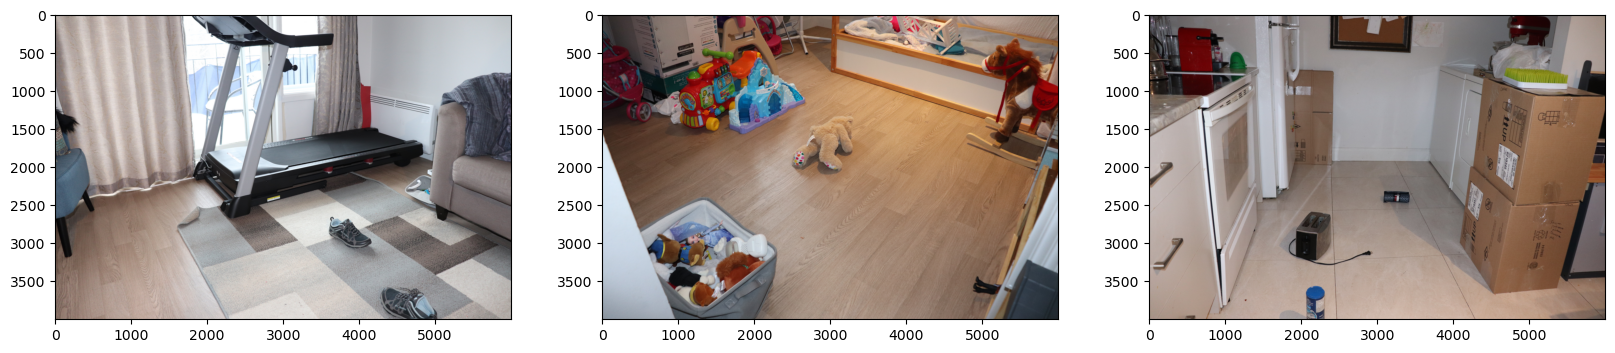

In [80]:
img_salon = cv2.imread('data/Images/Salon/IMG_6551.JPG')
img_chambre = cv2.imread('data/Images/Chambre/IMG_6567.JPG')
img_cuisine = cv2.imread('data/Images/Cuisine/IMG_6564.JPG')

ref_salon = cv2.imread('data/Images/Salon/Reference.JPG')
ref_chambre = cv2.imread('data/Images/Chambre/Reference.JPG')
ref_cuisine = cv2.imread('data/Images/Cuisine/Reference.JPG')



plt.figure(figsize=(20,10))
plt.subplot(131)
plotRGB(img_salon)
plt.subplot(132)
plotRGB(img_chambre)
plt.subplot(133)
plotRGB(img_cuisine)
plt.show()


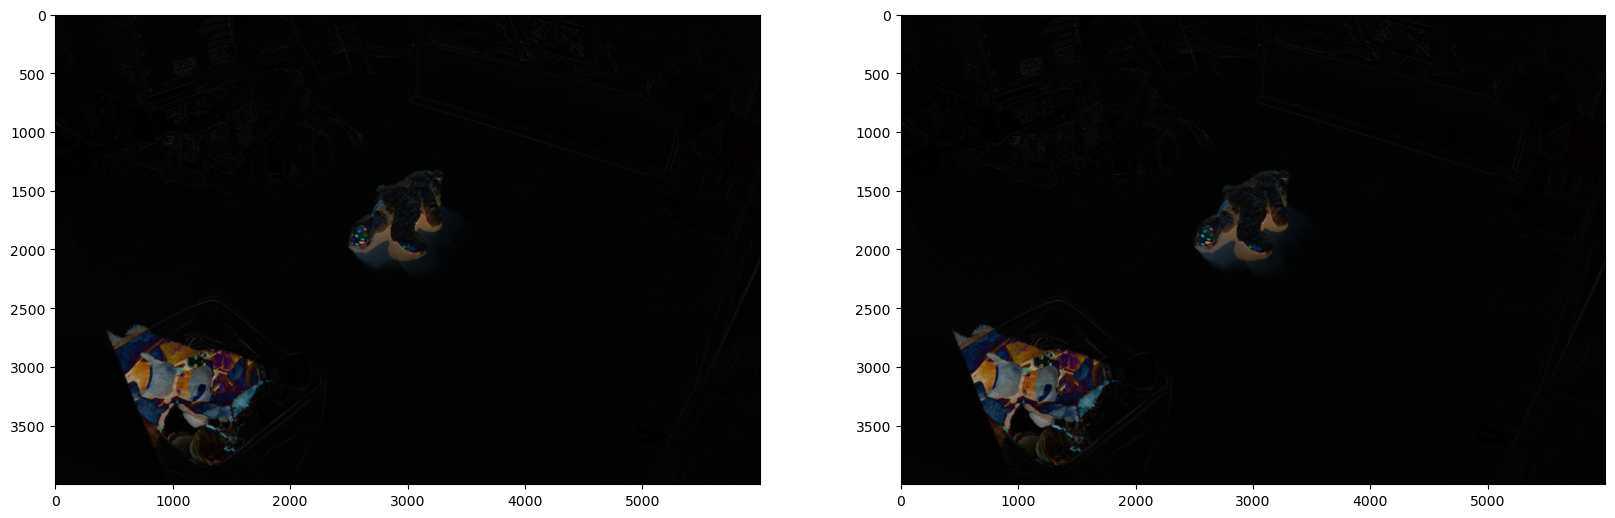

In [85]:
#diff = cv2.absdiff(img_salon, ref_salon)
diff = cv2.absdiff(img_chambre, ref_chambre)
diff2 = cv2.absdiff(ref_chambre, img_chambre)
plt.figure(figsize=(20,10))
plt.subplot(121)
plotRGB(diff)
plt.subplot(122)
plotRGB(diff2)
plt.show()

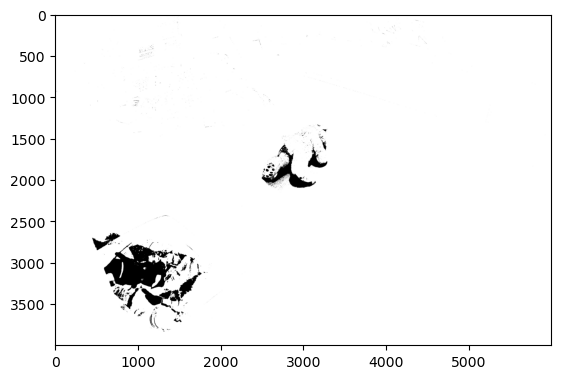

In [82]:
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plotRGB(thresh)

Text(0.5, 1.0, 'Opening')

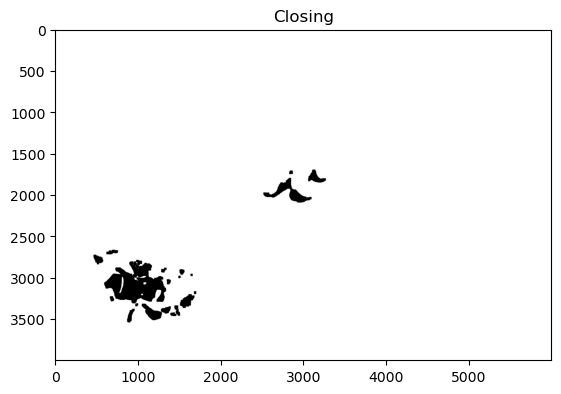

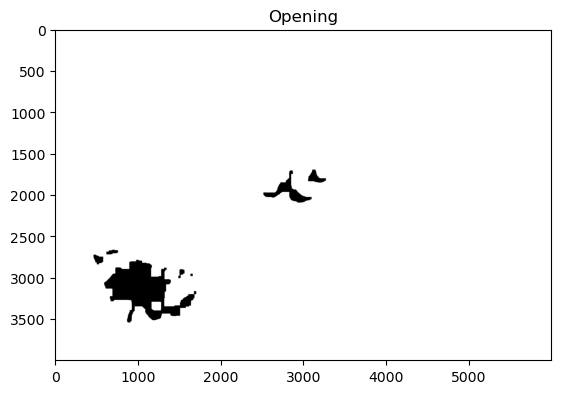

In [83]:
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((9,9), np.uint8), iterations=3)
plotRGB(closing)
plt.title('Closing')
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, np.ones((15,15), np.uint8), iterations=6)
plt.figure()
plotRGB(opening)
plt.title('Opening')

7


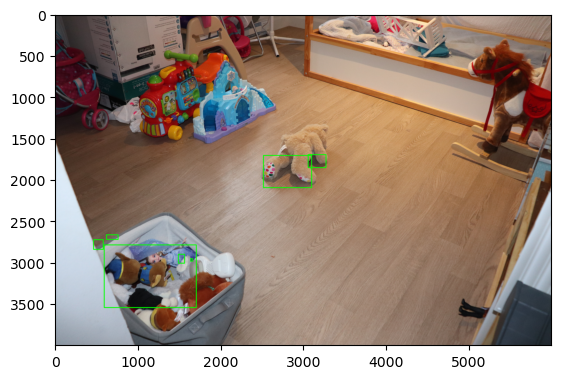

In [84]:
invert = cv2.bitwise_not(opening)

contours, _ = cv2.findContours(invert, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
#Draw contours
img = img_chambre.copy()

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 10)
plotRGB(img)

# Compute luminosity of each image per room

## Chambre

Mean = 121.25638844270833, std_dev = 4.651203018956389


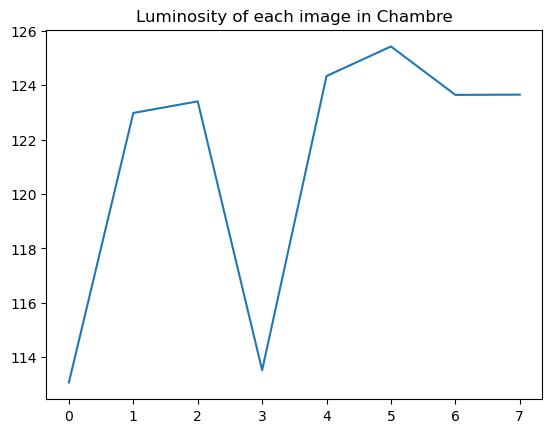

In [88]:
chambres = [cv2.imread(file) for file in glob.glob("data/Images/Chambre/*.JPG")]
lum = []

for img in chambres:
    #convert to HSL
    hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    #get luminosity
    lum.append(np.mean(hsl[:,:,1]))

plt.plot(lum)
plt.title('Luminosity of each image in Chambre')
print(f"Mean = {np.mean(lum)}, std_dev = {np.std(lum)}")

## Salon

Mean = 155.08021465151515, std_dev = 5.5486009350757115


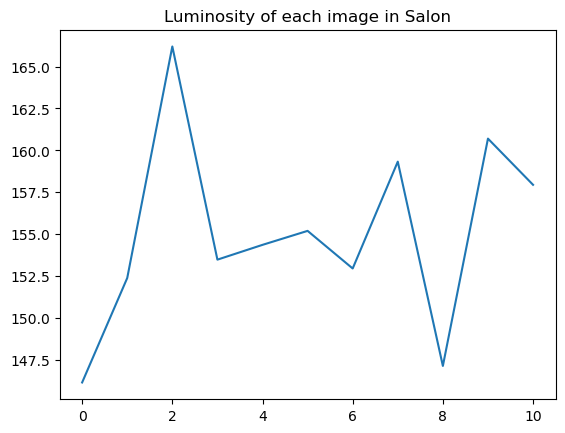

In [89]:
salon = [cv2.imread(file) for file in glob.glob("data/Images/Salon/*.JPG")]
lum = []

for img in salon:
    #convert to HSL
    hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    #get luminosity
    lum.append(np.mean(hsl[:,:,1]))

plt.plot(lum)
plt.title('Luminosity of each image in Salon')
print(f"Mean = {np.mean(lum)}, std_dev = {np.std(lum)}")

Mean = 135.49990488333333, std_dev = 14.118653155278691


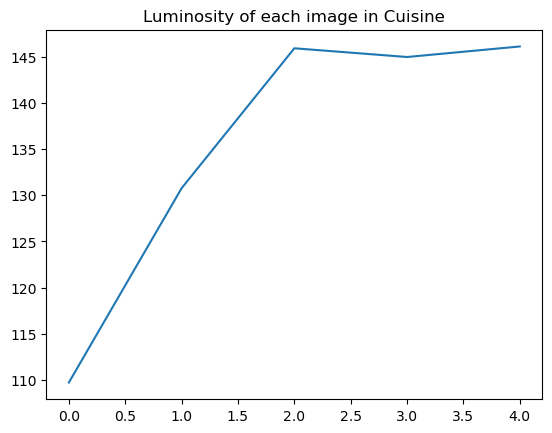

In [90]:
cuisine = [cv2.imread(file) for file in glob.glob("data/Images/Cuisine/*.JPG")]
lum = []

for img in cuisine:
    #convert to HSL
    hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    #get luminosity
    lum.append(np.mean(hsl[:,:,1]))

plt.plot(lum)
plt.title('Luminosity of each image in Cuisine')
print(f"Mean = {np.mean(lum)}, std_dev = {np.std(lum)}")

In [91]:
def eq_hist_hsv(img_bgr):
    H,S,V = cv2.split(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV))
    eq_V = cv2.equalizeHist(V)
    eq_img = cv2.cvtColor(cv2.merge([H,S,eq_V]), cv2.COLOR_HSV2BGR)
    return eq_img

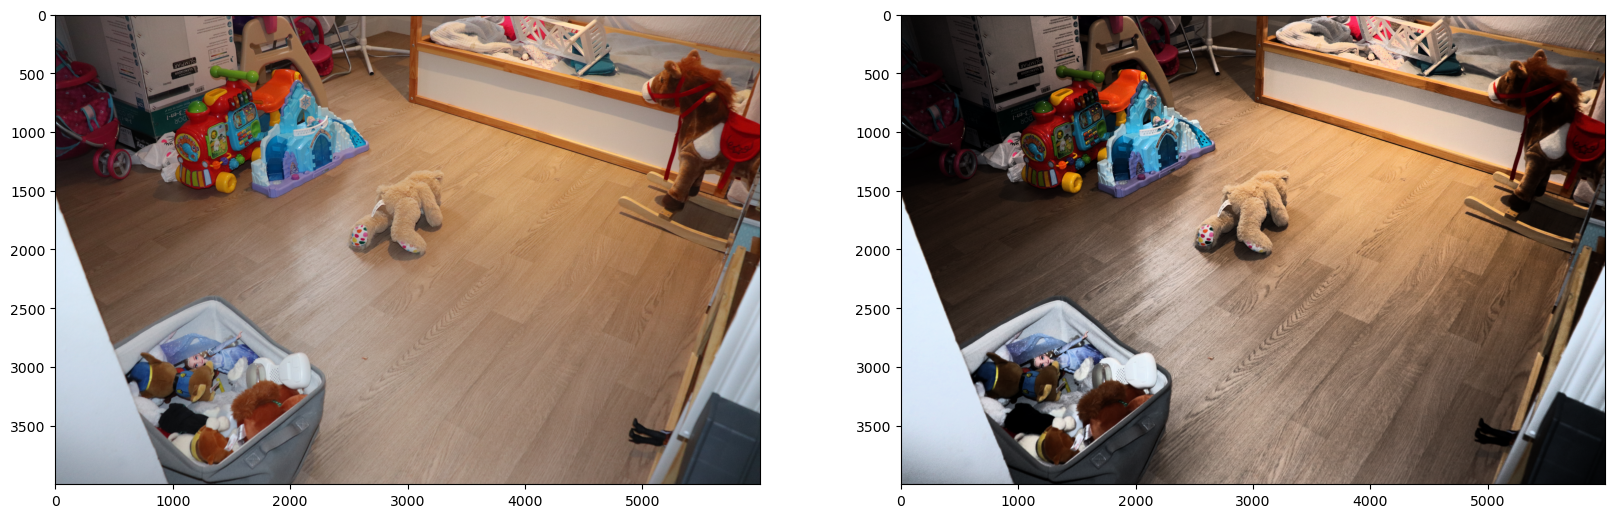

In [93]:
eq_img = eq_hist_hsv(img_chambre)
plt.figure(figsize=(20,10))
plt.subplot(121)
plotRGB(img_chambre)
plt.subplot(122)
plotRGB(eq_img)
plt.show()

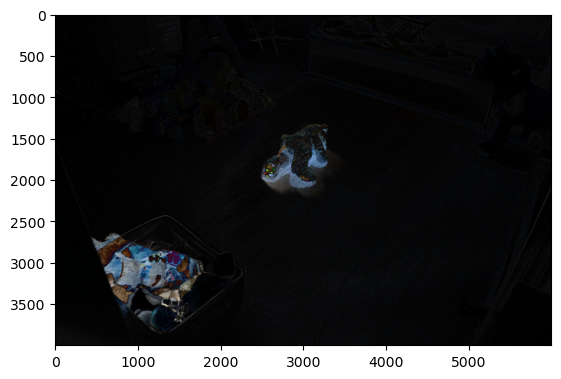

In [95]:
img = eq_hist_hsv(img_chambre)
ref = eq_hist_hsv(ref_chambre)

diff = cv2.absdiff(img, ref)
plt.imshow(diff, cmap='gray')

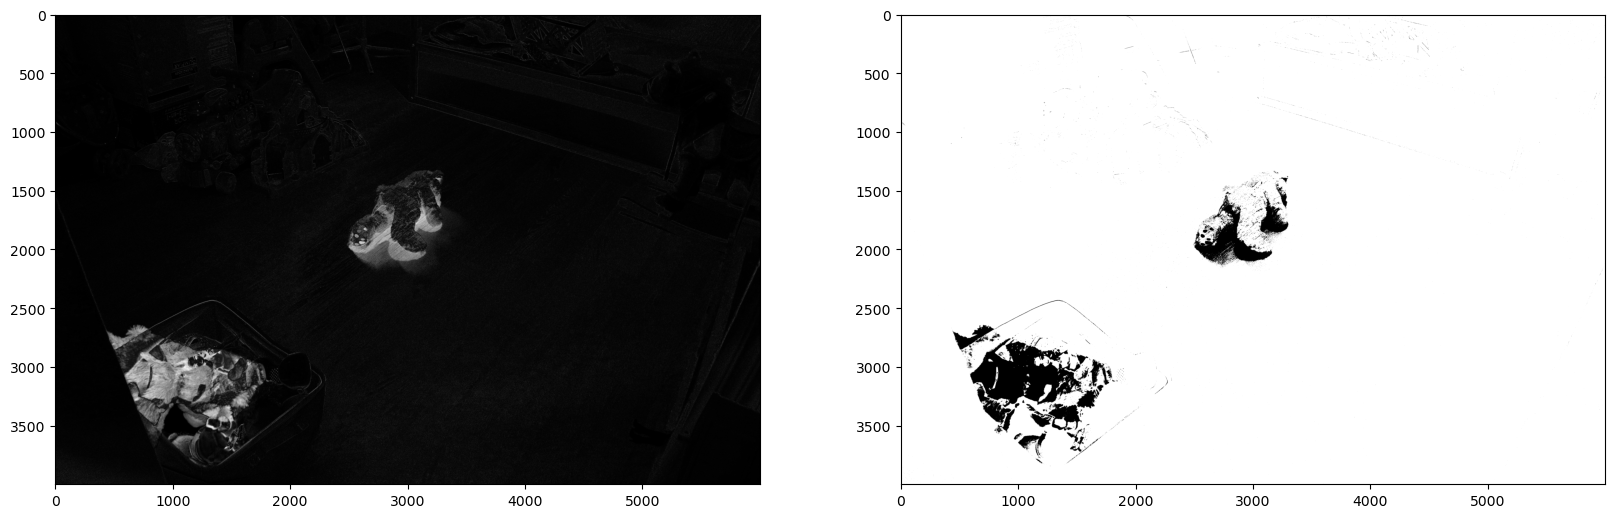

In [98]:
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.subplot(122)
plt.imshow(thresh, cmap='gray')

# Commence ICI

In [145]:
def get_img():
    return cv2.imread('data/Images/Salon/IMG_6551.JPG')

def get_ref():
    return cv2.imread('data/Images/Salon/Reference.JPG')

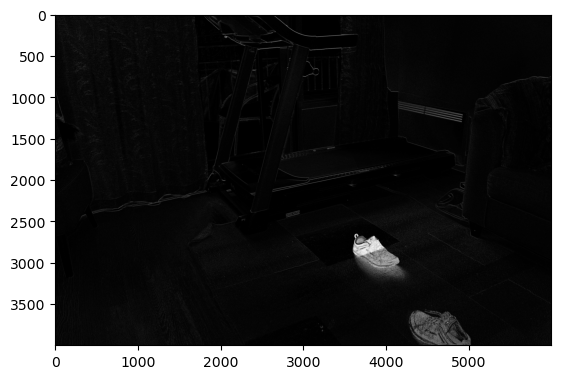

In [146]:
img = get_img()
ref = get_ref()
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ref_gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

eq_img = cv2.equalizeHist(im_gray)
eq_ref = cv2.equalizeHist(ref_gray)

diff = cv2.absdiff(eq_img, eq_ref)
plt.imshow(diff, cmap='gray')

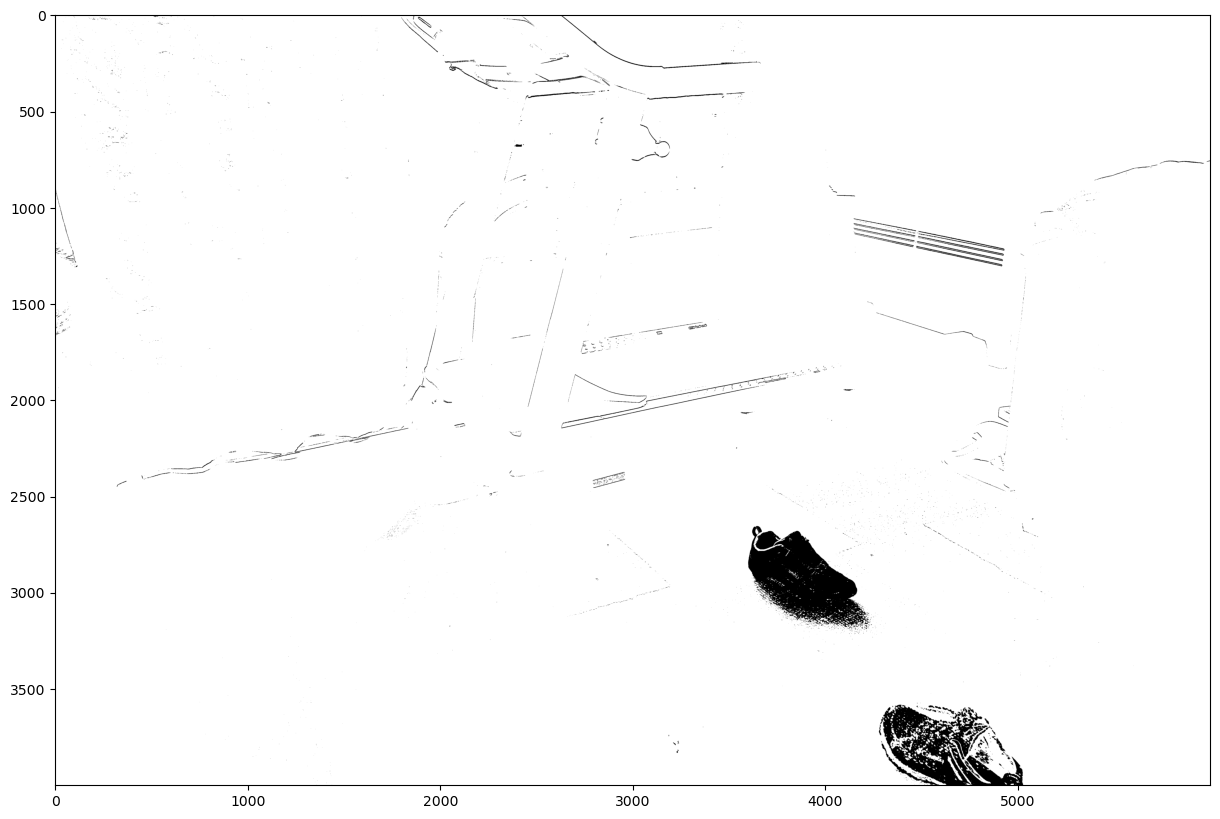

In [147]:
thresh = cv2.threshold(diff, 40, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.figure(figsize=(20,10))
plt.imshow(thresh, cmap='gray')


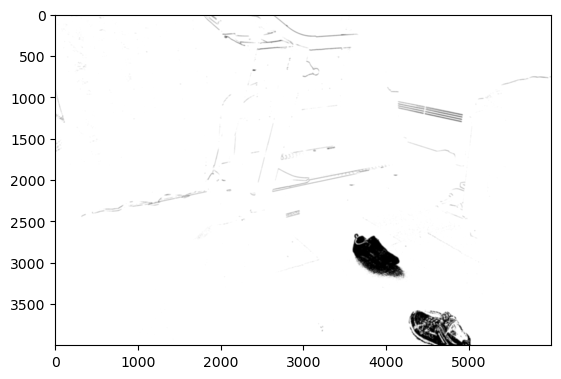

In [148]:
gauss = cv2.GaussianBlur(thresh, (15,15), 30)
plt.imshow(gauss, cmap='gray')

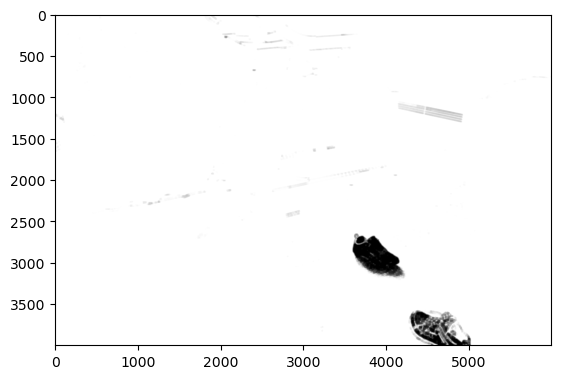

In [149]:
closing = cv2.morphologyEx(gauss, cv2.MORPH_CLOSE, np.ones((9,9), np.uint8), iterations=2)
plt.imshow(closing, cmap='gray')

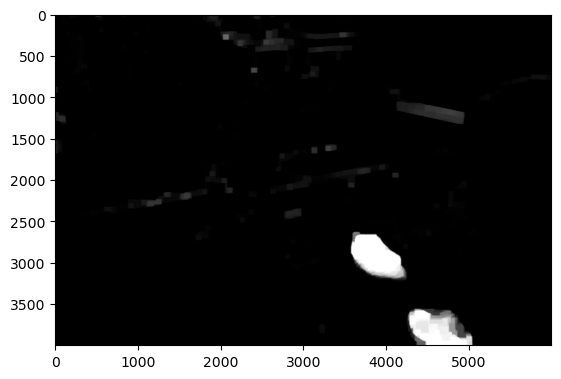

In [150]:
erode = cv2.erode(closing, np.ones((9,9), np.uint8), iterations=5)
opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, np.ones((9,9), np.uint8), iterations=10)
invert = cv2.bitwise_not(opening)
plt.imshow(invert, cmap='gray')

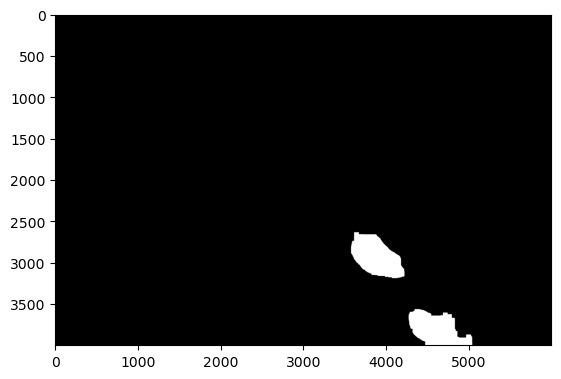

In [151]:
new_thresh = cv2.threshold(invert, 100, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(new_thresh, cmap='gray')

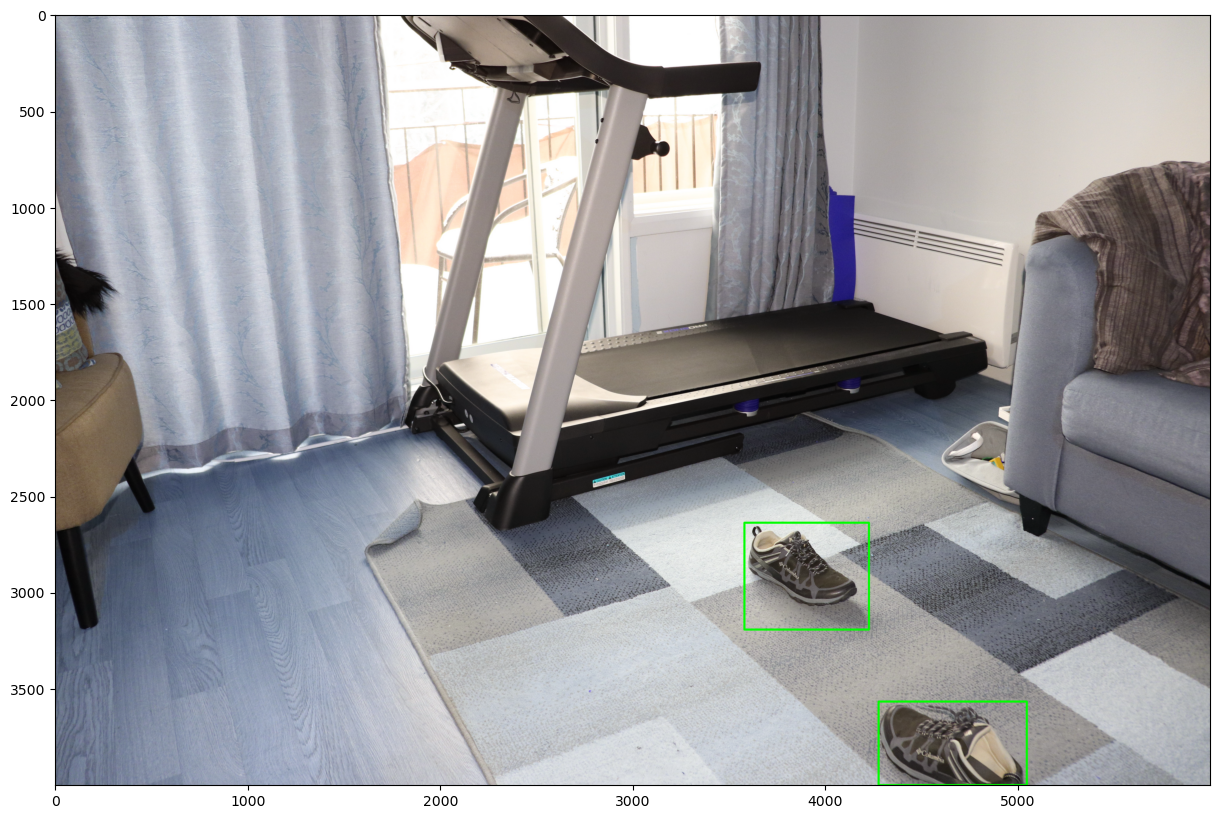

In [152]:
contours, _ = cv2.findContours(new_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = get_img()
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(result, (x,y), (x+w, y+h), (0,255,0), 10)

plt.figure(figsize=(20,10))
plt.imshow(result)